In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN

In [3]:
data = pd.read_csv('movieReplicationSet-2.csv')
names = data.columns[421:464].tolist() # extract all personality data
clean_data = data.dropna(subset=names)[names]
clean_data.shape

(1000, 43)

In [4]:
personality = clean_data.iloc[:,0:]
personality.columns

Index(['Tends to find fault with others', 'Does a thorough job',
       'Is depressed/Blue', 'Is original/comes up with new ideas',
       'Is reserved', 'Is helpful and unselfish with others',
       'Can be somewhat careless', 'Is relaxed/handles stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker', 'Can be tense',
       'Is ingenious/a deep thinker', 'Generates a lot of Enthusiasm',
       'Has a forgiving nature', 'Tends to be disorganized', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable/not easily upset', 'is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic/aesthetic experiences', 'Is sometimes shy/inhibited',
       'Is considerate and kind to almost everyone', 'Does t

In [5]:
zscoredData = stats.zscore(personality) # conduct PCA on personality
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(zscoredData)*-1
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

14.924
9.213
7.623
7.53
5.585
4.752
2.488
2.37
2.134
2.07
2.021
1.934
1.861
1.802
1.745
1.697
1.629
1.588
1.534
1.474
1.444
1.424
1.366
1.287
1.274
1.208
1.202
1.187
1.115
1.101
1.06
1.031
1.011
0.97
0.962
0.93
0.91
0.865
0.831
0.796
0.767
0.728
0.556


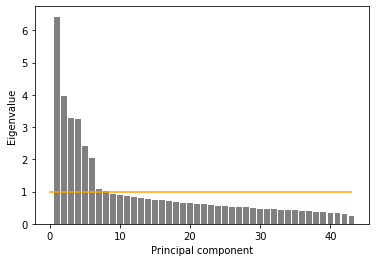

In [6]:
numClasses = 43 # 43 total personality columns
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [7]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

# 2) The "elbow" criterion: Pick only factors left of the biggest/sharpest
# drop. Here, this would yield 1 factor.
print('Number of factors selected by elbow criterion: 1')

# 3) Number of factors that account for 90% of the variance (Eigenvalues that 
# add up to 90% of the Eigensum. To account for at least 90% of the variability 
# in this data, we need 3 factors.
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

Number of factors selected by Kaiser criterion: 8
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 32


In [9]:
personality_PCA = origDataNewCoordinates[:,:8] # keep 8 personality PCAs
personality_PCA.shape

(1000, 8)

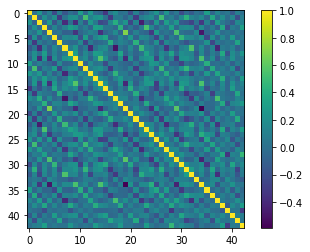

In [10]:
r = np.corrcoef(personality,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

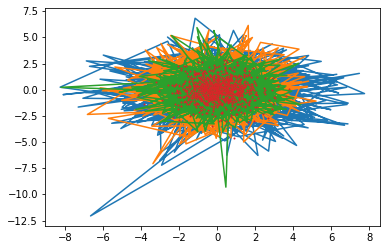

In [17]:
plt.plot(origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],origDataNewCoordinates[:,2],origDataNewCoordinates[:,3],origDataNewCoordinates[:,4],origDataNewCoordinates[:,5],origDataNewCoordinates[:,6],origDataNewCoordinates[:,7],'o',markersize=1)
plt.show()

In [13]:
# 7. Clustering - doing quantitatively what can be seen intuitively

# Clustering answers - in a data-driven way - which subgroup a datapoint belongs to.
# The "kMeans clustering" is like pca of clustering. It's not the only clustering 
# method, but it is the most commonly used one.

# Algorithm: Minimize the summed distances between a cluster center and its
# members. Once the minimum has been found (regardless of starting
# position), it stops. "Converging".

# Store our transformed data - the predictors - as x:
x = np.column_stack((origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],origDataNewCoordinates[:,2],origDataNewCoordinates[:,3],origDataNewCoordinates[:,4],origDataNewCoordinates[:,5],origDataNewCoordinates[:,6],origDataNewCoordinates[:,7]))
x.shape

(1000, 8)

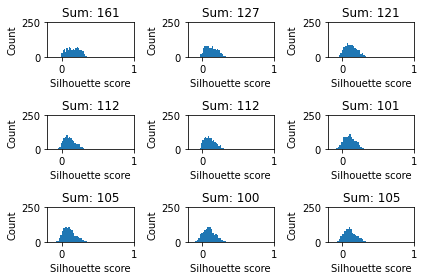

In [14]:
# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Remember: each data point gets its own silhouette coefficient ranging 
# from 0 (arbitrary classification) to 1 (ideal classification).

# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

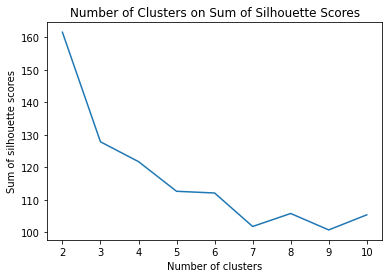

In [15]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.title('Number of Clusters on Sum of Silhouette Scores')
plt.show()

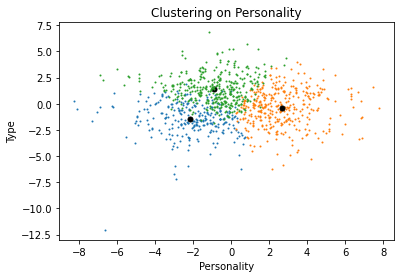

In [18]:
# Now let's recompute the kMeans using 4 clusters and plot the color-coded data

# Recompute kMeans:
numClusters = 3
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Personality')
    plt.ylabel('Type')
    plt.title('Clustering on Personality')
    
# As you can see, kMeans returns as many clusters as you ask for. 
# What it does is returns the optimal center that minimizes the summed
# distance from all centers. But it requires - as an input (!) - how many
# clusters to look for. Basically, you find what you look for in terms of
# cluster number. And the sum of the summed distances is only going down

# Solution: "Silhouette"
# Silhouette takes distances nearest neighbor clusters into account